In [109]:
# importing pandas for data manipulation
import pandas as pd
# importing cluster analysis libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#importing visualization libs
import matplotlib.pyplot as plt
import numpy as np

# Geospatial Analysis
Utilize the event location, district, and region information to perform geospatial analysis. Visualize the distribution of fatalities on a map and identify areas that have experienced higher levels of violence.

# Data Ingestion & Preprocessing

In [59]:
fatalities_spatiotemporal_df_with_GEO = pd.read_csv('Fatalities_Israel-Palestine_with_GEO.csv')

In [60]:
fatalities_spatiotemporal_df_with_GEO.shape

(9647, 18)

In [61]:
fatalities_spatiotemporal_df_with_GEO.isna().sum()

name                               0
date_of_event                      0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            14
took_part_in_the_hostilities    1235
place_of_residence                55
place_of_residence_district       55
type_of_injury                   278
ammunition                      4433
killed_by                          0
notes                            225
event_location_latitude            0
event_location_longitude           0
dtype: int64

## Imputing missing values

In [62]:
text_columns = [
    'name', 'citizenship', 'event_location', 'event_location_district',
    'event_location_region', 'gender', 'place_of_residence',
    'place_of_residence_district', 'type_of_injury', 'ammunition',
    'killed_by', 'notes', 'took_part_in_the_hostilities'
]

In [66]:
# replace 'nan' with 'unknown' in text columns
for column in text_columns:
    if column in fatalities_spatiotemporal_df_with_GEO.columns:
        fatalities_spatiotemporal_df_with_GEO[column].fillna('Unknown', inplace=True)

In [74]:
fatalities_spatiotemporal_df_with_GEO.took_part_in_the_hostilities.value_counts()

took_part_in_the_hostilities
No                            4094
Yes                           2998
Unknown                       1742
Israelis                       631
Object of targeted killing     182
Name: count, dtype: int64

In [68]:
fatalities_spatiotemporal_df_with_GEO.isna().sum()

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
notes                           0
event_location_latitude         0
event_location_longitude        0
dtype: int64

## Data typing

In [75]:
# Check the data types
fatalities_spatiotemporal_df_with_GEO.dtypes

name                             object
date_of_event                    object
age                             float64
citizenship                      object
event_location                   object
event_location_district          object
event_location_region            object
date_of_death                    object
gender                           object
took_part_in_the_hostilities     object
place_of_residence               object
place_of_residence_district      object
type_of_injury                   object
ammunition                       object
killed_by                        object
notes                            object
event_location_latitude         float64
event_location_longitude        float64
dtype: object

In [76]:
# Convert the date column to datetime format
fatalities_spatiotemporal_df_with_GEO['date_of_event'] = pd.to_datetime(fatalities_spatiotemporal_df_with_GEO['date_of_event'])
# set age to numeric
fatalities_spatiotemporal_df_with_GEO['age'] = pd.to_numeric(fatalities_spatiotemporal_df_with_GEO['age'], errors='coerce')
#set date_of_death to datetime
fatalities_spatiotemporal_df_with_GEO['date_of_death'] = pd.to_datetime(fatalities_spatiotemporal_df_with_GEO['date_of_death'], errors='coerce')
# set name, citizenship, event_location, event_location_district, event_location_region, gender, place_of_residence, place_of_residence_district, type_of_injury, ammunition, killed_by, and notes to text/string
# List of columns to change to string

# Change data type of specified columns to 'object' to ensure they're strings
for column in text_columns:
    if column in fatalities_spatiotemporal_df_with_GEO.columns:
        fatalities_spatiotemporal_df_with_GEO[column] = fatalities_spatiotemporal_df_with_GEO[column].astype('string')

In [78]:
fatalities_spatiotemporal_df_with_GEO.dtypes

name                            string[python]
date_of_event                   datetime64[ns]
age                                    float64
citizenship                     string[python]
event_location                  string[python]
event_location_district         string[python]
event_location_region           string[python]
date_of_death                   datetime64[ns]
gender                          string[python]
took_part_in_the_hostilities    string[python]
place_of_residence              string[python]
place_of_residence_district     string[python]
type_of_injury                  string[python]
ammunition                      string[python]
killed_by                       string[python]
notes                           string[python]
event_location_latitude                float64
event_location_longitude               float64
dtype: object

# Data Cleaning and Feature Engineering
## Using the GoogleAPI to extract latitude and longitude from the event_location column
This part was commented out due to the long run time. The data was saved to csv form and will be imported at the end of this commented section. The script that was used is the GeoLocation_Extract.py file in the SpatioTemporal subdirectory for this project

In [79]:
fatalities_spatiotemporal_df_with_GEO.tail()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes,event_location_latitude,event_location_longitude
9642,Amos Machlouf,2000-10-28,30.0,Israeli,Beit Jala,Bethlehem,West Bank,2000-10-28,M,Israelis,East Jerusalem,East Jerusalem,stabbing,Unknown,Palestinian civilians,Killed when he was stabbed and shot. His body ...,31.715999,35.187149
9643,Marik Gavrilov,2000-10-27,25.0,Israeli,Ramallah,Ramallah and al-Bira,West Bank,2000-10-27,M,Israelis,Banei Ayish,Israel,gunfire,live ammunition,Palestinian civilians,His body was found burnt in his car.,31.903764,35.203418
9644,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.,32.222668,35.262146
9645,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,Unknown,Israeli civilians,Killed by a settler from Itamar while harvesti...,32.175456,35.336484
9646,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.,32.222668,35.262146


# Exploratory Data Analysis
I will be running cluster analysis on the lat/long features over time

In [54]:
fatalities_spatiotemporal_df_with_GEO.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes', 'event_location_latitude',
       'event_location_longitude'],
      dtype='object')

In [87]:
spatio_temporal_columns = ['citizenship', 'event_location', 'event_location_district',
    'event_location_region', 'place_of_residence',
    'place_of_residence_district', 'date_of_event', 'date_of_death']

In [88]:
fatalities_spatiotemporal_df_with_GEO.event_location.isna().sum()

0

 ~0.13% of the data was dropped due to missing geolocation data

In [101]:
fatalities_spatiotemporal_df_with_GEO.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes', 'event_location_latitude',
       'event_location_longitude', 'date_ordinal_since_event'],
      dtype='object')

In [86]:
fatalities_spatiotemporal_df_with_GEO.shape

(9647, 18)

In [100]:
#   fe for cluster analysis
# Convert datetime to ordinal (number of days since a reference date)
fatalities_spatiotemporal_df_with_GEO['date_ordinal_since_event'] = fatalities_spatiotemporal_df_with_GEO.date_of_event.dt.date.apply(lambda x: x.toordinal())

In [102]:
# scaling the numerical spatio-temporal features for kmeans clustering (distance metric is sensitive to scale)
features = ['date_ordinal_since_event', 'event_location_latitude', 'event_location_longitude']

# Perform scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(fatalities_spatiotemporal_df_with_GEO[features])

In [103]:
# Define the number of clusters you want to form
num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data_scaled)

# Add cluster number back to original data
fatalities_spatiotemporal_df_with_GEO['event_location_cluster_in_time'] = kmeans.labels_

/Users/mocha/.conda/envs/dataenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [107]:
fatalities_spatiotemporal_df_with_GEO.loc[:, ['event_location', 'date_of_event', 'event_location_cluster_in_time']].tail()

,event_location,date_of_event,event_location_cluster_in_time
9642,Beit Jala,2000-10-28,1
9643,Ramallah,2000-10-27,1
9644,Nablus,2000-10-19,1
9645,Beit Furik,2000-10-17,1
9646,Nablus,2000-10-07,1


## Visualization of the Clusters as EDA

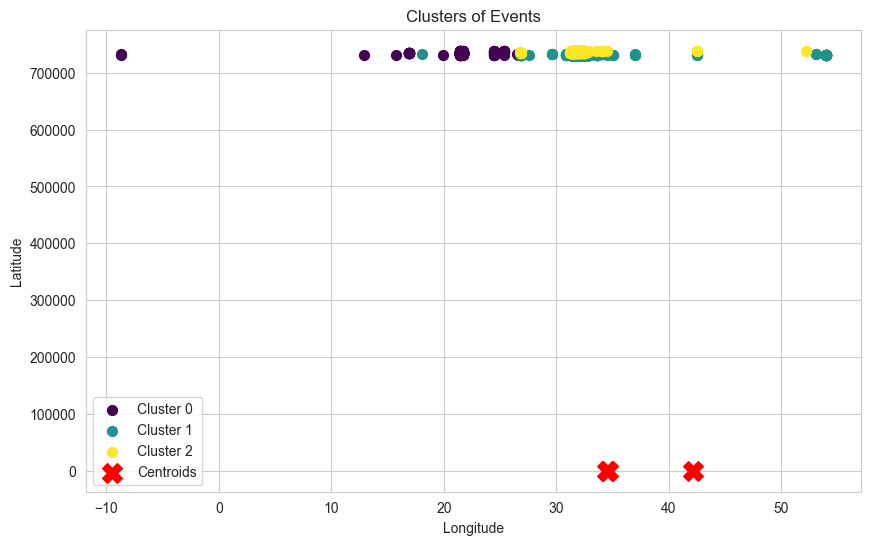

In [114]:
# Assume 'data' is your DataFrame and it has columns 'latitude', 'longitude', and 'cluster'
# which contains the cluster labels.

# Create a scatter plot
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

# Generate a color palette, one color per cluster
num_clusters = fatalities_spatiotemporal_df_with_GEO['event_location_cluster_in_time'].nunique()
cluster_colors = [plt.cm.viridis(each) for each in np.linspace(start=0, stop=1, num=num_clusters)]

for i, color in enumerate(cluster_colors):
    # Plot each cluster with its own color and label
    clustered_data = fatalities_spatiotemporal_df_with_GEO[fatalities_spatiotemporal_df_with_GEO['event_location_cluster_in_time'] == i]
    plt.scatter(clustered_data[features[1]], clustered_data[features[0]], c=[color], label=f'Cluster {i}', s=50)

# If you want to plot centroids
if 'kmeans' in globals():  # Check if you have 'kmeans' variable from previous clustering steps
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # If you scaled your features, you need to reverse the transformation
    plt.scatter(centroids[:, 2], centroids[:, 1], s=200, marker='X', c='red', label='Centroids')  # centroids[:, 2] for longitude and centroids[:, 1] for latitude

plt.title('Clusters of Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Include a legend to show which color represents which cluster
plt.legend()

# Show the plot
plt.show()

## Conclusions:
The centorids indicate the location of the attack events in the palestine and israel regions / territories are shifted more to higher longitudes, but latitude stays constant (mostly). This indicates that the attacks are more concentrated in the northern regions of the territories. Noting the cluster label where the centroids are located, we noticed cluster 2/3 are centered at the centroids. We also can notice that cluster 2 has less variance and so I've decided to choose this cluster for further investigation by looking at the top 5 event ('attack') locations and the top 5 citizenships of the victims.

In [116]:
cluster2 = fatalities_spatiotemporal_df_with_GEO.where(fatalities_spatiotemporal_df_with_GEO.event_location_cluster_in_time == 2).dropna(how='all')

In [119]:
cluster2.event_location_district.value_counts()[:5]

event_location_district
Gaza             851
North Gaza       595
Khan Yunis       518
Rafah            495
Deir al-Balah    298
Name: count, dtype: Int64

In [120]:
cluster2.citizenship.value_counts()[:5]

citizenship
Palestinian    3476
Israeli         155
Jordanian         2
American          1
Name: count, dtype: Int64